In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import chisquare
from scipy.stats import t, ttest_1samp
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

url = 'https://raw.githubusercontent.com/dsguseong/Mystudy/main/vgames2.csv'
df = pd.read_csv(url)
df.head()
df.drop('Unnamed: 0', axis = 1, inplace=True) # 중복된 인덱스 열 제거 후 적용

#df = df.infer_objects()
df.info() #결측지 확인하기


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [2]:
df.isnull() #결측지 확인

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
16593,False,False,False,False,False,False,False,False,False
16594,False,False,False,False,False,False,False,False,False
16595,False,False,False,False,False,False,False,False,False
16596,False,False,False,False,False,False,False,False,False


In [3]:
df.isnull().sum()  #각 칼럼별 결측지 수 총합 확인

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [4]:
df = df.dropna(how='any') #결측지 수가 데이타 수에 비하여 미비하기에 제거하여도 무방하다고 판단, 결측지가 하나라도 있는 행 모두 제거, 총 제거 수 : 379개
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [5]:
df.info() #결측지 제거 후 데이터 정보

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  object 
 6   EU_Sales     16241 non-null  object 
 7   JP_Sales     16241 non-null  object 
 8   Other_Sales  16241 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB


In [6]:
df = df[df.Year > 1900] #1900년도 이상의 데이터만 불러오기 
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [7]:
#df_a = df.iloc[:,[0,1,2,3,4]]
#pf = pd.to_numeric(df_a['Platform'], errors='coerce')
#df_a['Platform'] = pf.dropna(how='any')
#df_a['Platform'] = df_a['Platform'].apply(lambda x: x.replace('2600', '0'))

#df_a.apply(pd.to_numeric, errors='raise').head(40)


In [8]:
df_a1 = df.iloc[:,[0,1,2,3,4]]
df_b1 = df.iloc[:,[5,6,7,8]]
NA1 = pd.to_numeric(df_b1['NA_Sales'], errors='coerce')
a1 = NA1.dropna(how='any')
EU1 = pd.to_numeric(df_b1['EU_Sales'], errors='coerce')
b1 = EU1.dropna(how='any')
JP1 = pd.to_numeric(df_b1['JP_Sales'], errors='coerce')
c1 = JP1.dropna(how='any')
Other1 = pd.to_numeric(df_b1['Other_Sales'], errors='coerce')
d1 = Other1.dropna(how='any')
df_a1['NA_Sales'] = a1.mul(1000)
df_a1['EU_Sales'] = b1.mul(1000)
df_a1['JP_Sales'] = c1.mul(1000)
df_a1['Other_Sales'] = d1.mul(1000) #각 세일즈 열 안에 있던 K and M 값 모두 제거 한 후의 수치에다가 백만 숫자를 곱하기 그리고 데이터프레임에 각 세일즈 열을 합쳐주기 (단위는 달러가 됨)
df01 = df_a1.dropna(how='any')    # 모든 sales 열 안에 있는 K or M 값이 포함되어 있는 행의 데이터 모두 제거  
df01 ##############이거는 세일즈 돈의 단위가 K 즉 1 = 1천달러

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40.0,0.0,0.0,0.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170.0,0.0,0.0,10.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20.0,0.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120.0,90.0,0.0,40.0
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150.0,40.0,0.0,10.0
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10.0,0.0,0.0,0.0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440.0,190.0,30.0,130.0
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,50.0,50.0,250.0,30.0


In [9]:
df_a = df.iloc[:,[0,1,2,3,4]]
df_b = df.iloc[:,[5,6,7,8]]
NA = pd.to_numeric(df_b['NA_Sales'], errors='coerce')
a = NA.dropna(how='any')
EU = pd.to_numeric(df_b['EU_Sales'], errors='coerce')
b = EU.dropna(how='any')
JP = pd.to_numeric(df_b['JP_Sales'], errors='coerce')
c = JP.dropna(how='any')
Other = pd.to_numeric(df_b['Other_Sales'], errors='coerce')
d = Other.dropna(how='any')
df_a['NA_Sales'] = a.mul(1000000)
df_a['EU_Sales'] = b.mul(1000000)
df_a['JP_Sales'] = c.mul(1000000)
df_a['Other_Sales'] = d.mul(1000000) #각 세일즈 열 안에 있던 K and M 값 모두 제거 한 후의 수치에다가 백만 숫자를 곱하기 그리고 데이터프레임에 각 세일즈 열을 합쳐주기 (단위는 달러가 됨)
df0 = df_a.dropna(how='any')    # 모든 sales 열 안에 있는 K or M 값이 포함되어 있는 행의 데이터 모두 제거  
df0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000.0,0.0,0.0,0.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20000.0,0.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150000.0,40000.0,0.0,10000.0
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10000.0,0.0,0.0,0.0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,50000.0,50000.0,250000.0,30000.0


In [10]:
df0.isnull().sum() # 전처리 후 데이터의 결측지 수 확인 

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [11]:
#aa = df['NA_Sales'].str.contains("K")  나중에 포함된것만 분류해서 제거 하는거 방법 알아보자 지금은 시간없으니 일단 간단한걸로 넘어가장^^
#df[aa]

In [12]:
#df['NA_Sales'].replace('M','')
#df['NA_Sales'].astype('float')
#NA = pd.to_numeric(df['NA_Sales', 'EU_Sales'], errors='coerce')

#NA = df3.dropna(how='any')
#df3.head(40)
#df3
#df['NA_Sales'].replace('K','')
#df['NA_Sales'].head(20)
#df['NA_Sales'] = pd.to_numeric(df['NA_Sales'])
####################str.replace 로 하는거 알아보자!!!!!!!!!!!!!
#열 에있는 같은 값 중복제거 하면 몇년도부터 몇년도 범위도 알 수 있고 장르도 마찬가지고....
#concat iloc?  merge join etc... 알아야 하는 메소드들이 정말 많고... 일단은 반복적으로 보고 해보는 방법밖에 없돠...
#일단 모든 결측값이나 잘못된 수치의 값들의 행들을 모두 제거하는 정제과정을 거쳤지만, 가능하다면 M or K -> 이러한 str 을 int or float type 변경 및 연산해주고 numeric한 값들을 제거해주거나
#결측지를 다른 값으로 대체( 0 or 바로 앞이나 뒤의 데이터를 따르거나 평균치로)하거나 제거해주거나 해서 최대한 원본데이터를 보존해주는 방식을 채택하는것이 좋다. 

In [13]:
#df['Platform'].cat.categories

In [14]:

df1 = df0.set_index("Name") #Name 칼럼을 인덱스로 세팅
df1

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Name,,,,,,,,
Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000.0,0.0,0.0,0.0
The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0
Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20000.0,0.0
Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000.0,0.0,0.0,0.0
Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0
...,...,...,...,...,...,...,...,...
Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150000.0,40000.0,0.0,10000.0
Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10000.0,0.0,0.0,0.0
NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0


In [15]:
df1.transpose() # 전치 해보기 인덱스는 각 컬럼스 그리고 컬럼스는 인덱스였던 네임들이 세팅됨

Name,Candace Kane's Candy Factory,The Munchables,Otome wa Oanesama Boku ni Koi Shiteru Portable,Deal or No Deal: Special Edition,Ben 10 Ultimate Alien: Cosmic Destruction,Power Pro Kun Pocket 8,JASF: Jane's Advanced Strike Fighters,Samurai Warriors: State of War,Imabikisou,The Penguins of Madagascar: Dr. Blowhole Returns - Again!,Harvest Moon: More Friends of Mineral Town,Mount & Blade,The Professor's Brain Trainer: Logic,Zoids Dash,Mini Ninjas,Rise of Nations,Hajime no Ippo: The Fighting! (2014),Grand Kingdom,Tropico Reloaded,Ty the Tasmanian Tiger,Ghost in the Shell,Cabela's Dangerous Hunts 2,Don Bradman Cricket 14,Injustice: Gods Among Us,Dr. Muto,Starwinder: The Ultimate Space Race,World of Tanks,Famicom Mini: Makaimura,McGrath Vs. Pastrana Freestyle Motocross,Kids Learn Music A+ Edition,Project Sylpheed: Arc of Deception,Mario & Luigi: Paper Jam & Mario Kart 7 Double Pack,Mega Man Anniversary Collection,G-Force,Beamrider,Ninja Reflex,FIFA World Cup Germany 2006,Vagrant Story,Knights of Honor,Phoenix Wright: Ace Attorney - Trials and Tribulations,...,Left 4 Dead,Crayon Shin-Chan Shokkugan! Densetsu o Yobu Omake Daiketsusen!!,ASH: Archaic Sealed Heat,Zen-Nippon GT Senshuken,LEGO Rock Raiders,7 Days to Die,Dragon's Crown,Terraria,The Voice,Sherlock Holmes: The Mystery of the Mummy,Wall-E,Way of the Samurai 3,Toshochu: Run for Money,Um Jammer Lammy,Yakuza,Kimikare: New Semester,Power Pro Kun Pocket,Amped 2,GoldenEye 007 (2010),Finding Nemo,Brave Story: New Traveler (US sales),Grand Theft Auto V,Yoru no Nai Kuni,Pinball Hall of Fame: The Gottlieb Collection,Super Ghouls 'n Ghosts,LEGO The Hobbit,Shanghai: True Valor,LEGO Indiana Jones 2: The Adventure Continues,Bionicle Heroes,Pokemon Channel,Jikkyou Powerful Pro Yakyuu 2000 Ketteiban,MindJack,Namco Soccer Prime Goal,White Album: Tsuzurareru Fuyu no Omoide,Minna no Chizu 2,Ice Age 2: The Meltdown,Rainbow Islands: Revolution,NBA 2K16,Toukiden: The Age of Demons,The King of Fighters '95
Platform,DS,Wii,PSP,DS,PS3,DS,PC,PSP,PS3,PS3,GBA,PC,DS,DS,PS3,PC,PS3,PS4,PC,PS2,PS,XB,X360,PS3,GC,PS,PC,GBA,PS,DS,X360,3DS,PS2,Wii,2600,Wii,XB,PS,PC,DS,...,X360,DS,DS,SNES,PS,XOne,PSV,PS3,PS3,DS,Wii,PS3,3DS,PS,PS3,PSP,GB,XB,DS,PS2,PSP,PC,PS4,PSP,GBA,XOne,PS,Wii,DS,GC,PS,PS3,PS,PS3,PSP,GC,PSP,PS3,PSV,PS
Year,2008,2009,2010,2010,2010,2005,2011,2005,2007,2011,2003,2008,2005,2006,2009,2003,2014,2015,2009,2002,1997,2005,2014,2013,2002,1996,2011,2004,2000,2011,2006,2015,2004,2009,1984,2008,2006,2000,2004,2007,...,2008,2010,2007,1995,1999,2016,2013,2013,2014,2009,2008,2008,2012,1998,2012,2012,1999,2003,2010,2003,2006,2015,2015,2005,2002,2014,1998,2009,2006,2003,2000,2011,1995,2010,2007,2006,2005,2015,2013,1996
Genre,Action,Action,Adventure,Misc,Platform,Sports,Simulation,Action,Adventure,Action,Simulation,Role-Playing,Puzzle,Role-Playing,Action,Strategy,Sports,Role-Playing,Strategy,Platform,Simulation,Sports,Sports,Fighting,Platform,Racing,Shooter,Platform,Racing,Misc,Shooter,Misc,Platform,Action,Racing,Action,Sports,Role-Playing,Strategy,Adventure,...,Shooter,Action,Role-Playing,Racing,Strategy,Action,Role-Playing,Action,Action,Adventure,Platform,Action,Adventure,Misc,Action,Action,Sports,Sports,Action,Action,Role-Playing,Action,Role-Playing,Misc,Platform,Action,Puzzle,Action,Shooter,Adventure,Sports,Shooter,Sports,Adventure,Misc,Platform,Action,Sports,Action,Fighting
Publisher,Destineer,Namco Bandai Games,Alchemist,Zoo Games,D3Publisher,Konami Digital Entertainment,Deep Silver,Tecmo Koei,Sega,THQ,Ubisoft,Paradox Interactive,505 Games,Tomy Corporation,Eidos Interactive,Microsoft Game Studios,Namco Bandai Games,Nippon Ichi Software,Kalypso Media,Electronic Arts,Sony Computer Entertainment,Activision,Tru Blu Entertainment,Warner Bros. Interactive Entertainment,Midway Games,Mindscape,Wargaming.net,Capcom,Acclaim Entertainment,Unknown,Microsoft Game Studios,Nintendo,Capcom,Disney Interactive Studios,Activision,Electronic Arts,Electronic Arts,Crave Entertainment,Sunflowers,Capcom,...,Electronic Arts,Namco B

In [16]:
#tidy0 = df0.melt(id_vars = 'Name', value_vars = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
#tidy0

In [17]:
#tidy0 = tidy0.rename(
    #columns = {
     #   'Name': 'row', 
      #  'variable': 'column', 
       # 'value': 'value'
        #}
#)
#tidy0.head(60)
#import seaborn as sns
#sns.catplot(x = 'row', y = 'value', col = 'column', kind = 'bar', data = tidy1, height = 2);

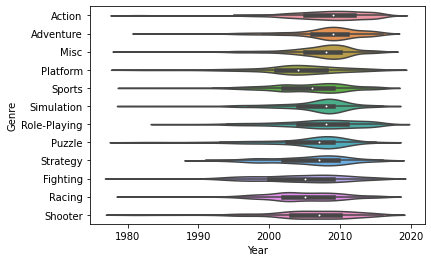

In [18]:
sns.violinplot(
    x = 'Year', 
    y = 'Genre',
    data = df0
);#연도별로 어떤 게임장르들이 많이 출시되었는지 알아보기 위하여 바이올린 차트를 사용. 

위 바이올린 시각화를 사용하여 보았을 때, 대부분의 게임장르들이 2000년대 초에서 2010년 초반까지를 기점으로 많이 출시되었고, 특히 어드벤쳐 게임, Misc, Puzzle 및 시뮬레이션 게임이 타 장르들에 비해 많이 출시되었다고 보임. 

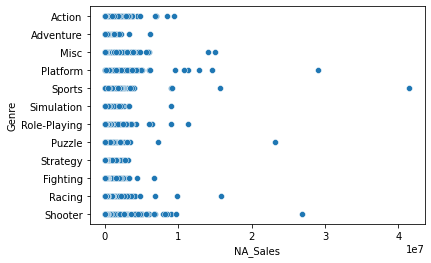

In [19]:
sns.scatterplot(x = 'NA_Sales', y = 'Genre', data = df0); #장르별 북미매출의 분포도를 시각화하여 비교하려 하였지만 구분하기 쉽지 않음. 북미에서는 스포츠 게임이 최고 매출을 기록하기도 하였지만
                                                          # 평균적으로 생각하였을 때 어느 장르의 매출이 가장 두각을 나타내는지 알아보기가 힘듬.

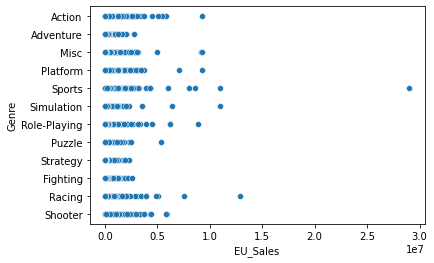

In [20]:
sns.scatterplot(x = 'EU_Sales', y = 'Genre', data = df0);

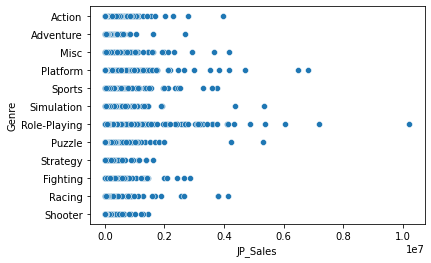

In [21]:
sns.scatterplot(x = 'JP_Sales', y = 'Genre', data = df0);

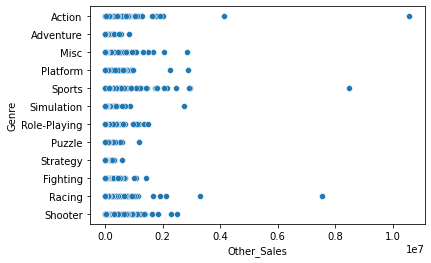

In [22]:
sns.scatterplot(x = 'Other_Sales', y = 'Genre', data = df0);

각 지열별 기준으로 모든 게임장르들의 매출지표를 비교하였을 때, 타 지역에 비하여 일본에서 장르별 매출이 평균적으로 가장 높아보인다고 볼 수 있음

In [23]:
df0['Total_Sales'] = df0['NA_Sales'] + df0['JP_Sales'] + df0['EU_Sales'] + df0['Other_Sales']
df0 # 지역별 매출의 총합을 Total_Sales 라는 컬럼을 만들어 데이터셋에 추가

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000.0,0.0,0.0,0.0,40000.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0,180000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20000.0,0.0,20000.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000.0,0.0,0.0,0.0,40000.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0,250000.0
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150000.0,40000.0,0.0,10000.0,200000.0
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10000.0,0.0,0.0,0.0,10000.0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0,790000.0
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,50000.0,50000.0,250000.0,30000.0,380000.0


In [24]:
#df01['Total_Sales'] = df01['NA_Sales'] + df01['JP_Sales'] + df01['EU_Sales'] + df01['Other_Sales']
#df01 # 지역별 매출의 총합을 Total_Sales 라는 컬럼을 만들어 데이터셋에 추가 (매출단위가 K인 경우)

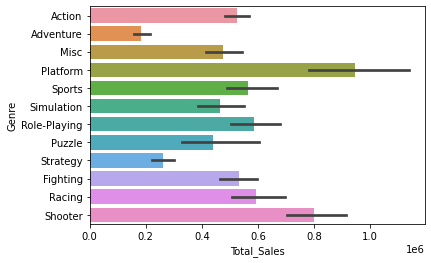

In [25]:
sns.barplot(x = 'Total_Sales', y = 'Genre', data = df0);

장르별 총매출을 시각화한 바차트를 분석하였을 때 Platform 게임과 슈팅 게임이 유독 높은 총매출을 기록한 것을 볼 수 있다. 그렇기에 유저들이 플랫폼으로 게임플레이를 하는 것을 선호한다는 사실을 유추해낼 수 있고, 또한 슈팅게임을 많이 선호한다는 것을 유추할 수 있다. 그 외에 어드벤쳐 게임 및 전략게임 장르가 가장 선호도가 낮고 나머지 장르들의 선호도는 비슷하다고 볼 수 있다.

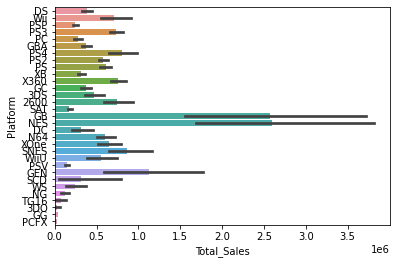

In [26]:
sns.barplot(x = 'Total_Sales', y = 'Platform', data = df0);

모든 지역의 총 매출을 기준으로 장르별 및 플랫폼(기기)별로 비교하였을 때 플랫폼은 NES, GB 및 GEN 순으로 높은 매출을 기록한 성향을 파악할 수 있다.

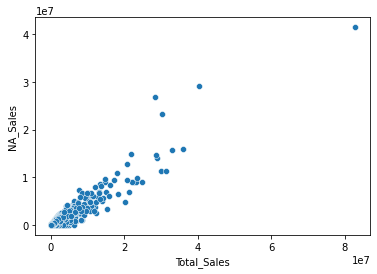

In [27]:
sns.scatterplot(x = 'Total_Sales', y = 'NA_Sales', data = df0);

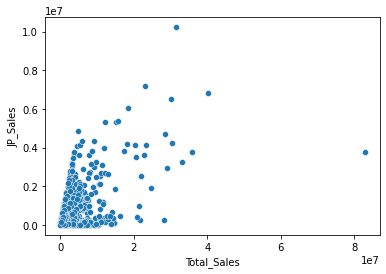

In [28]:
sns.scatterplot(x = 'Total_Sales', y = 'JP_Sales', data = df0);

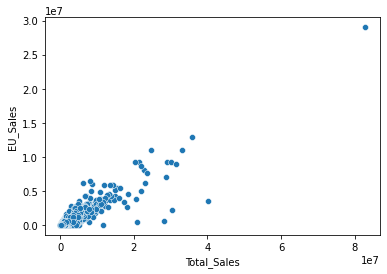

In [29]:
sns.scatterplot(x = 'Total_Sales', y = 'EU_Sales', data = df0);

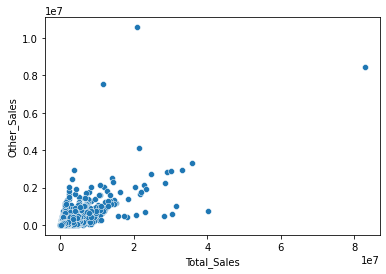

In [30]:
sns.scatterplot(x = 'Total_Sales', y = 'Other_Sales', data = df0);

스캐터플랏으로는 총 매출 대비 각 지역별 매출의 분포를 한눈에 비교하기에는 무리가 있음 (차이를 분간하기 어려움)

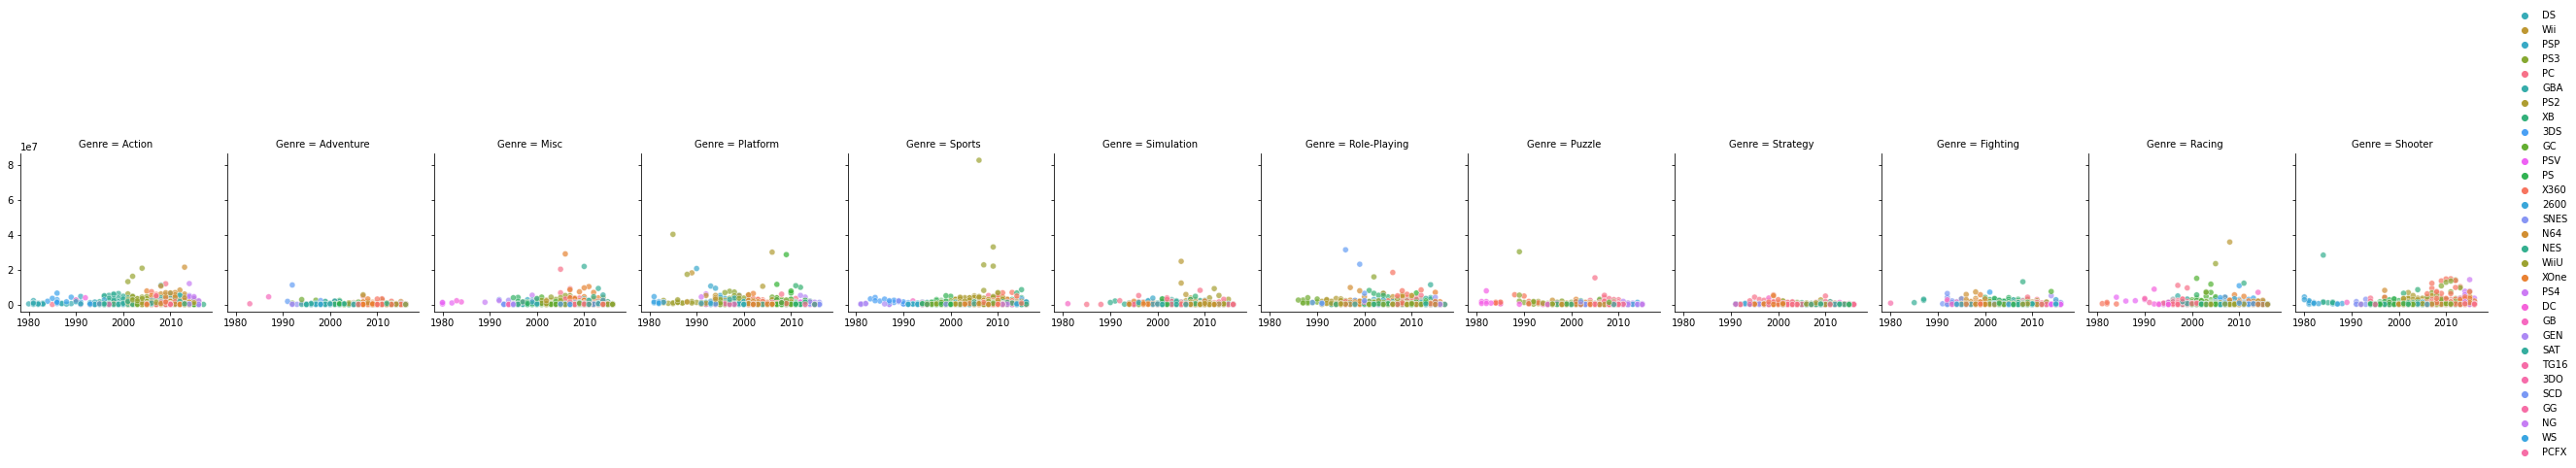

In [31]:
# facet

g = sns.FacetGrid(data = df0, col = 'Genre')

g.map_dataframe(
    sns.scatterplot,
    x = 'Year',
    y = 'Total_Sales',
     hue = 'Platform',
    alpha = 0.7, # tranparency
    data = df0
)
g.add_legend();

장르별로 차트를 나누고 플랫폼종류별로 분포값에 색깔을 메겼지만 연도별 총매출에대한 시각화는 구별하기가 어렵다.

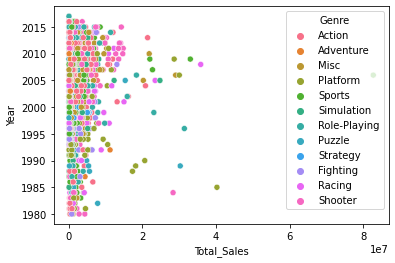

In [32]:
sns.scatterplot(x = 'Total_Sales', y = 'Year', hue = 'Genre', data = df0);

In [33]:
import plotly.express as px
px.scatter(df0, x = 'Year', y = 'Total_Sales', color = 'Genre')

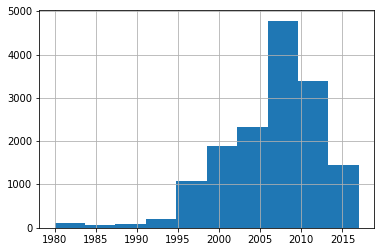

In [34]:
df0['Year'].hist(); #연도별로 출시된 게임 수